Simple analysis of the Titanic data-set for the Kaggle competition: https://www.kaggle.com/c/titanic with 3 different algorithms:
- random forest 
- linear regression
- xgboost

**Best Score: 0.78469 ** 

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [ ]:
ls

In [2]:
#reading files downloaded from https://www.kaggle.com/c/titanic/data
#desciption of the files is avaible at the before mentioned adress
test= pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
########################
# cleaning train dataset
########################


train["Age"] = train["Age"].fillna(train["Age"].median())
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Sex"]=train["Sex"].astype(float)

# Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna("S")

# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

train.Cabin=train.Cabin.fillna("0")
train.Cabin=train.Cabin.str[:1]

train.Cabin[train.Cabin=="A"]=1
train.Cabin[train.Cabin=="B"]=2
train.Cabin[train.Cabin=="C"]=3
train.Cabin[train.Cabin=="D"]=4
train.Cabin[train.Cabin=="E"]=5
train.Cabin[train.Cabin=="F"]=6
train.Cabin[train.Cabin=="G"]=7
train.Cabin[train.Cabin=="T"]=8
train.Cabin[train.Cabin=="0"]=0
train.Cabin=train.Cabin.astype(float)



train["family_size"] = train["SibSp"] + train["Parch"] + 1


In [6]:
###############################################################
#   cleaning test data and formatting strings to numbers     #
###############################################################

#print(test[test.Fare.isnull()==True].index[0])

test["Age"] = test["Age"].fillna(test["Age"].median())
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

test["Fare"][test[test.Fare.isnull()==True].index[0]] = test.Fare.median()

test.Cabin=test.Cabin.fillna("0")
test.Cabin=test.Cabin.str[:1]

test.Cabin[test.Cabin=="A"]=1
test.Cabin[test.Cabin=="B"]=2
test.Cabin[test.Cabin=="C"]=3
test.Cabin[test.Cabin=="D"]=4
test.Cabin[test.Cabin=="E"]=5
test.Cabin[test.Cabin=="F"]=6
test.Cabin[test.Cabin=="G"]=7
test.Cabin[test.Cabin=="T"]=8
test.Cabin[test.Cabin=="0"]=0
test.Cabin=test.Cabin.astype(float)

test["family_size"] = test["SibSp"] + test["Parch"] + 1

In [7]:
###################################################################
# Creating target and features numpy arrays: target, features_one #
###################################################################
list_columns= ["Pclass", "Sex", "Age", "family_size", "Cabin", "Fare", "SibSp", "Parch", "Embarked"]

target_dtc = train["Survived"].values
features_dtc = train[list_columns].values

test_features = test[list_columns].values
PassengerId =np.array(test["PassengerId"]).astype(int)

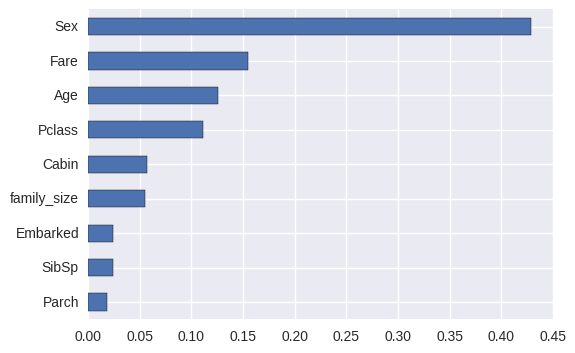

In [8]:
###############################################################
#               Random Forest Classifier                      #
###############################################################

decision_rf = RandomForestClassifier(n_estimators=100,
                                     min_samples_leaf=5,
                                     max_features='auto',
                                     oob_score=True,
                                     random_state=42,
                                     n_jobs=-1
                                     )


fitting_rf = decision_rf.fit(features_dtc, target_dtc)

# Look at the importance and score of the included features
feature_importances = pd.Series(decision_rf.feature_importances_, index=list_columns)
feature_importances.sort()
feature_importances.plot(kind="barh")
plt.show()

#print("RF feature importance")
#for index,column in enumerate(list_columns):
#    print(column + ": " + str(decision_rf.feature_importances_[index]))

In [9]:
#score of the training dataset
print("score of the Random Forest on the training dataset is " + str(decision_rf.score(features_dtc, target_dtc)))

prediction_rf = decision_rf.predict(test_features)
solution_rf = pd.DataFrame(prediction_rf, PassengerId, columns = ["Survived"])
solution_rf.to_csv("solution_rf.csv", index_label = ["PassengerId"])

score of the Random Forest on the training dataset is 0.882154882155


This solution had a score on kaggle's titanic submission: **  0.78469 **

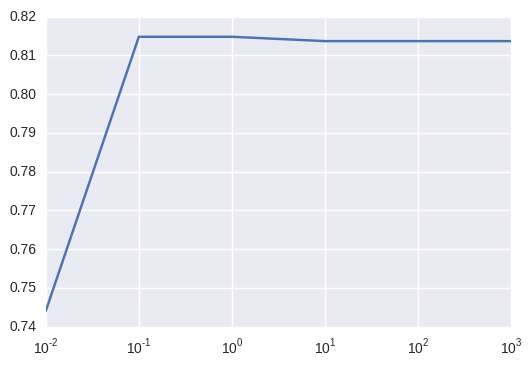

In [10]:
###############################################################
#               Logistic Regression                           #
###############################################################

result=[]
c_value =[0.01,0.1,1,10,1e2,1e3]
for value in c_value:
    decision_lr = LogisticRegression(C=value
                                     ,random_state=0
                                     ,solver='liblinear'
                                    )

    fitting_lr = decision_lr.fit(features_dtc, target_dtc)
    result.append(decision_lr.score(features_dtc, target_dtc))

results = pd.Series(result, index=c_value).plot(logx=True)
plt.show()


In [11]:
#score of the training dataset

print("score of the Logistic regression on the training dataset is " + str(decision_lr.score(features_dtc, target_dtc)))

prediction_rf = decision_lr.predict(test_features)
solution_rf = pd.DataFrame(prediction_rf, PassengerId, columns = ["Survived"])
solution_rf.to_csv("solution_logistic_regression.csv", index_label = ["PassengerId"])

score of the Logistic regression on the training dataset is 0.813692480359



This solution had a score on kaggle's titanic submission: **  0.75120 **


In [14]:
## XGBOOST ##
xgb_model = xgb.XGBClassifier()
                         
xgb_model.fit(features_dtc, target_dtc)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=0, silent=True,
       subsample=1)

In [16]:
# Look at the importance and score of the included features
#feature_importances = pd.Series(xgb_model.feature_importances_, index=list_columns)
#feature_importances.sort()
#feature_importances.plot(kind="barh")
#plt.show()

In [17]:
print("score of the XGB model on the training dataset is " + str(xgb_model.score(features_dtc, target_dtc)))


prediction_xgb = xgb_model.predict(test_features)
solution_rf = pd.DataFrame(prediction_xgb, PassengerId, columns = ["Survived"])
solution_rf.to_csv("solution_xbg_model.csv", index_label = ["PassengerId"])


score of the XGB model on the training dataset is 0.877665544332


This solution had a score on kaggle's titanic submission: **  0.76077 **

In [29]:
## XGBOOST  OPTIMIZATION##


cv_params = {'max_depth': [1,3,5]
             ,'min_child_weight': [1,3,6]
             ,'n_estimators': [10, 100, 1000]
             ,'learning_rate' : [0.01, 0.05,0.1,0.5]
             }

ind_params ={'seed':42, 
             #'learning_rate': 0.05, 
             'subsample': 0.6, 
             'colsample_bytree': 0.6, 
             'objective': 'binary:logistic'
             #,'n_estimators' : 1000
             ,'max_depth': 5
             #,'min_child_weight': 3
            }   

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 


In [30]:
optimized_GBM.fit(features_dtc, target_dtc)


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bytree=0.6, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, n_estimators=100, nthread=-1,
       objective='binary:logistic', seed=42, silent=True, subsample=0.6),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'n_estimators': [10, 100, 1000], 'learning_rate': [0.01, 0.05, 0.1, 0.5], 'max_depth': [1, 3, 5], 'min_child_weight': [1, 3, 6]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='accuracy', verbose=0)

In [33]:
print(optimized_GBM.best_score_)


0.845117845118


In [34]:
print(optimized_GBM.best_params_)

{'n_estimators': 1000, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3}


In [22]:
## XGBOOST ##
xgb_model_opt = xgb.XGBClassifier(seed=42 
                                 ,learning_rate= 0.05 
                                 ,subsample= 0.8
                                 ,colsample_bytree= 0.8 
                                 ,objective = 'binary:logistic'
                                 ,n_estimators = 1000
                                 ,max_depth = 3
                                 ,min_child_weight= 2
                                 )
                         
xgb_model_opt.fit(features_dtc, target_dtc)

XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, n_estimators=100,
       nthread=-1, objective='binary:logistic', seed=42, silent=True,
       subsample=1)

In [23]:
print("score of the optimized XGB model on the training dataset is " + str(xgb_model_opt.score(features_dtc, target_dtc)))


prediction_xgb = xgb_model_opt.predict(test_features)
solution_rf = pd.DataFrame(prediction_xgb, PassengerId, columns = ["Survived"])
solution_rf.to_csv("solution_xbg_opt_model.csv", index_label = ["PassengerId"])

score of the optimized XGB model on the training dataset is 0.877665544332


This solution had a score on kaggle's titanic submission: ** 0.68421 **
